In [1]:
import os

root_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
os.chdir(root_dir)

import functions

In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


### using 'keyword:"Toxin [KW-0800]" AND reviewed:yes on [UniProt](https://www.uniprot.org/uniprot/?query=keyword%3A%22Toxin+%5BKW-0800%5D%22+AND+reviewed%3Ayes&sort=score)

In [57]:
#sequences
seqs = functions.read_seqs('data/uniprot/Toxin_Keyword/uniprot-reviewed yes+keyword Toxin+[KW-0800] .fasta.gz')
#annotations
annots = pd.read_csv('data/uniprot/Toxin_Keyword/uniprot-reviewed yes+keyword Toxin+[KW-0800] .tab.gz', sep='\t')

all_seqs = pd.merge(seqs, annots, on='Entry')
all_seqs.shape

124 sequences were removed because they had unknown residues.


(6925, 38)

In [58]:
all_seqs['Taxonomic lineage (KINGDOM)'].value_counts()

Metazoa          6207
Viridiplantae     126
Fungi              90
Orthornavirae      49
Name: Taxonomic lineage (KINGDOM), dtype: int64

In [19]:
#Taking eukaryotes
euk_seq = all_seqs[all_seqs['Taxonomic lineage (SUPERKINGDOM)'] == 'Eukaryota'].copy()
euk_seq.shape

(6423, 38)

In [20]:
# taking eukaryotes with SP and experimental evidence only
toxin_sp = euk_seq[euk_seq['Signal peptide'].apply(lambda x: '000269' in str(x))].copy()
toxin_sp.shape

(464, 38)

In [21]:
toxin_sp[toxin_sp.Entry == 'P49125']

,Entry,All,Protein,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,...,Taxonomic lineage (ORDER),Taxonomic lineage (SUPERCLASS),Taxonomic lineage (SUPERFAMILY),Taxonomic lineage (SUPERKINGDOM),Cross-reference (Pfam),Biotechnological use,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE)


### [Animal toxin annotation program](https://www.uniprot.org/uniprot/?query=taxonomy%3A%22Metazoa+%5B33208%5D%22+%28keyword%3Atoxin+OR+annotation%3A%28type%3A%22tissue+specificity%22+venom%29%29+reviewed%3Ayes)
#### taxonomy:"Metazoa [33208]" (keyword:toxin OR annotation:(type:"tissue specificity" venom)) AND reviewed:yes

In [22]:
#sequences
seqs = functions.read_seqs('data/uniprot/Animal_Toxin_Annotation_Project/uniprot-taxonomy Metazoa+[33208] +(keyword toxin+OR+annotation --.fasta.gz')
#annotations
annots = pd.read_csv('data/uniprot/Animal_Toxin_Annotation_Project/uniprot-taxonomy Metazoa+[33208] +(keyword toxin+OR+annotation --.tab.gz', sep='\t')

all_seqs = pd.merge(seqs, annots, on='Entry')
all_seqs.shape

130 sequences were removed because they had unknown residues.


(7105, 38)

In [23]:
atp_sp = all_seqs[all_seqs['Signal peptide'].apply(lambda x: '000269' in str(x))].copy()
atp_sp.shape

(499, 38)

### From SignalP 5.0 data

In [24]:
#Eukaryotic signal peptide

all_ = pd.read_pickle('results/signalp5_train_all.pkl.gz')
all_sp = all_[all_.Label == 1].copy()

import re


sp5_1 = all_sp[all_sp['Protein names'].str.contains('\s*toxi\s*',\
                                                            regex=True, flags=re.IGNORECASE)].copy()
sp5_2 = all_sp[all_sp['Keywords'].apply(lambda x: 'toxin' in x or 'Toxin' in x)].copy()
sp5_1_ = sp5_1[sp5_1['Signal peptide'].apply(lambda x: '000269' in str(x))].copy()
sp5_2_ = sp5_2[sp5_2['Signal peptide'].apply(lambda x: '000269' in str(x))].copy()

In [25]:
signalp5_toxins_ = pd.concat([sp5_1_, sp5_2_]).drop_duplicates().reset_index(drop=True)

In [26]:
signalp5_toxins_[signalp5_toxins_['Label'] == 1]

,Entry,All,Protein,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,...,Cross-reference (Pfam),Biotechnological use,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),Cleavage,Accession,Label,Aligned
0,P10144,sp|P10144|GRAB_HUMAN Granzyme B OS=Homo sapien...,MQPILLLLAFLLLPRADAGEIIGGHEAKPHSRPYMAYLMIWDQKSL...,GRAB_HUMAN,reviewed,Granzyme B (EC 3.4.21.79) (C11) (CTLA-1) (Cath...,GZMB CGL1 CSPB CTLA1 GRB,Homo sapiens (Human),247,"SIGNAL 1..18; /evidence=""ECO:0000269|PubMed:1...",...,PF00089;,NaN,NaN,"DOMAIN 21..245; /note=""Peptidase S1""; /evide...",IPR009003;IPR043504;IPR001314;IPR001254;IPR018...,PS50240;PS00134;PS00135;,18.0,P10144|EUKARYA|SP|2,1,__MQPILLLLAFLLLPRADAGEIIGGHEAKPHSRPYMAYLM
1,P23631,sp|P23631|LATA_LATTR Alpha-latrotoxin-Lt1a OS=...,MISVGEIMERANHSLVRMRREGEDLTLEEKAEICSELELQQKYVDI...,LATA_LATTR,reviewed,Alpha-latrotoxin-Lt1a (Alpha-LTX-Lt1a) (Alpha-...,NaN,Latrodectus tredecimguttatus (Mediterranean bl...,1401,"SIGNAL 1..20; /evidence=""ECO:0000269|PubMed:9...",...,PF12796;,NaN,NaN,NaN,IPR002110;IPR020683;IPR036770;,PS50297;PS50088;,20.0,P23631|EUKARYA|SP|0,1,MISVGEIMERANHSLVRMRREGEDLTLEEKAEICSELELQQ
2,P59938,sp|P59938|KGX22_MESMA Potassium channel toxin ...,MKISFVLLLTLFICSIGWSEARPTDIKCSASYQCFPVCKSRFGKTN...,KGX22_MESMA,reviewed,Potassium channel toxin gamma-KTx 2.2 (BmKK7) ...,NaN,Mesobuthus martensii (Manchurian scorpion) (Bu...,57,"SIGNAL 1..21; /evidence=""ECO:0000269|PubMed:2...",...,PF00451;,NaN,NaN,NaN,IPR036574;IPR001947;,NaN,21.0,P59938|EUKARYA|SP|1,1,KISFVLLLTLFICSIGWSEARPTDIKCSASYQCFPVCKSRF
3,P29459,sp|P29459|IL12A_HUMAN Interleukin-12 subunit a...,MCPARSLLLVATLVLLDHLSLARNLPVATPDPGMFPCLHHSQNLLR...,IL12A_HUMAN,reviewed,Interleukin-12 subunit alpha (IL-12A) (Cytotox...,IL12A NKSF1,Homo sapiens (Human),219,"SIGNAL 1..22; /evidence=""ECO:0000269|PubMed:2...",...,PF03039;,NaN,NaN,NaN,IPR009079;IPR004281;,NaN,22.0,P29459|EUKARYA|SP|0,1,PARSLLLVATLVLLDHLSLARNLPVATPDPGMFPCLHHSQN
4,P29460,sp|P29460|IL12B_HUMAN Interleukin-12 subunit b...,MCHQQLVISWFSLVFLASPLVAIWELKKDVYVVELDWYPDAPGEMV...,IL12B_HUMAN,reviewed,Interleukin-12 subunit beta (IL-12B) (Cytotoxi...,IL12B NKSF2,Homo sapiens (Human),328,"SIGNAL 1..22; /evidence=""ECO:0000269|PubMed:2...",...,PF10420;,NaN,NaN,"DOMAIN 23..106; /note=""Ig-like C2-type""; DOMA...",IPR003961;IPR036116;IPR003530;IPR007110;IPR036...,PS50853;PS01354;PS50835;,22.0,P29460|EUKARYA|SP|3,1,HQQLVISWFSLVFLASPLVAIWELKKDVYVVELDWYPDAPG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,P20656,sp|P20656|RIP6_SAPOF Ribosome-inactivating pro...,MKIYVVATIAWILLQFSAWTTTDAVTSITLDLVNPTAGQYSSFVDK...,RIP6_SAPOF,reviewed,Ribosome-inactivating protein saporin-6 (SAP-6...,SAP6,Saponaria officinalis (Common soapwort) (Lychn...,299,"SIGNAL 1..24; /evidence=""ECO:0000269|PubMed:2...",...,PF00161;,NaN,NaN,NaN,IPR036041;IPR017989;IPR001574;IPR017988;IPR016...,PS00275;,24.0,P20656|EUKARYA|SP|0,1,VVATIAWILLQFSAWTTTDAVTSITLDLVNPTAGQYSSFVD
403,P93543,sp|P93543|RIP1_SAMNI Ribosome-inactivating pro...,MKVVATILYLVVLAICGLGIHGAHPTHSAPPTVYPSVSFNLTEANS...,RIP1_SAMNI,reviewed,Ribosome-inactivating protein SNAI' [Cleaved i...,NaN,Sambucus nigra (European elder),569,"SIGNAL 1..28; /evidence=""ECO:0000269|PubMed:9...",...,PF00652;PF00161;,NaN,NaN,"DOMAIN 315..435; /note=""Ricin B-type lectin 1...",IPR036041;IPR017989;IPR001574;IPR017988;IPR016...,PS50231;PS00275;,28.0,P93543|EUKARYA|SP|3,1,YLVVLAICGLGIHGAHPTHSAPPTVYPSVSFNLTEANSNEY
404,Q9U8X3,sp|Q9U8X3|TACA2_TACTR Tachystatin-A2 OS=Tachyp...,MKLQNTLILIGCLFLMGAMIGDAYSRCQLQGFNCVVRSYGLPTIPC...,TACA2_TACTR,reviewed,Tachystatin-A2,NaN,Tachypleus tridentatus (Japanese horseshoe crab),67,"SIGNAL 1..23; /evidence=""ECO:0000269|PubMed:1...",...,PF11406;,NaN,NaN,NaN,IPR022717;,NaN,23.0,Q9U8X3|EUKARYA|SP|4,1,QNTLILIGCLFLMGAMIGDAYSRCQLQGFNCVVRSYGLPTI
405,P01545,sp|P01545|THNA_HORVU Alpha-hordothionin OS=Hor...,MVCLLILGLVLEQVQVEGKSCCRSTLGRNCYNLCRVRGAQKLCAGV...,THNA_HORVU,reviewed,Alpha-hordothionin (Puro

/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/venn/_backwards_compatibility.py:16: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  "`get_labels()` is retained for backwards compatibility; " +
/Volumes/userdata/student_users/bikashkumarbhandari/anaconda3/lib/python3.7/site-packages/venn/_backwards_compatibility.py:32: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"


<Figure size 288x288 with 0 Axes>

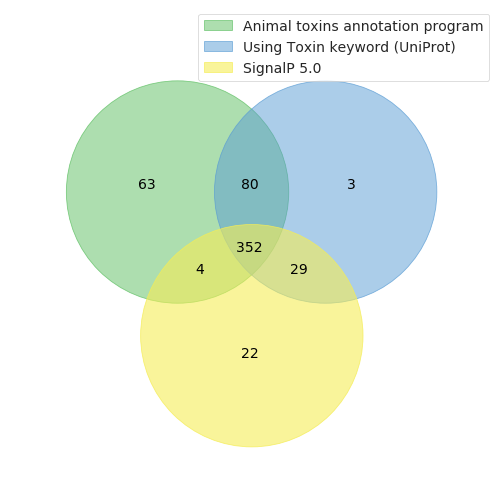

In [27]:
import venn

Animal_Toxin_Annotation_Project_Signal_Peptides = set(atp_sp.Entry)
Toxic_Signal_Peptides = set(toxin_sp.Entry)
SignalP_Toxins = set(signalp5_toxins_.Entry)

plt.figure(figsize=(4, 4))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

data = [Animal_Toxin_Annotation_Project_Signal_Peptides, Toxic_Signal_Peptides, SignalP_Toxins]

labels = venn.get_labels(data, fill=['number',])
fig, ax = venn.venn3(labels, names=['Animal toxins annotation program', 'Using Toxin keyword (UniProt)', 'SignalP 5.0'])
fig.show()

In [28]:
#New possible toxins in SignalP 5.0 data

signalp5_toxins_[signalp5_toxins_.Entry.apply(lambda x: (x not in atp_sp.Entry.values) and (x not in toxin_sp.Entry.values))]

,Entry,All,Protein,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,...,Cross-reference (Pfam),Biotechnological use,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),Cleavage,Accession,Label,Aligned
0,P10144,sp|P10144|GRAB_HUMAN Granzyme B OS=Homo sapien...,MQPILLLLAFLLLPRADAGEIIGGHEAKPHSRPYMAYLMIWDQKSL...,GRAB_HUMAN,reviewed,Granzyme B (EC 3.4.21.79) (C11) (CTLA-1) (Cath...,GZMB CGL1 CSPB CTLA1 GRB,Homo sapiens (Human),247,"SIGNAL 1..18; /evidence=""ECO:0000269|PubMed:1...",...,PF00089;,NaN,NaN,"DOMAIN 21..245; /note=""Peptidase S1""; /evide...",IPR009003;IPR043504;IPR001314;IPR001254;IPR018...,PS50240;PS00134;PS00135;,18.0,P10144|EUKARYA|SP|2,1,__MQPILLLLAFLLLPRADAGEIIGGHEAKPHSRPYMAYLM
3,P29459,sp|P29459|IL12A_HUMAN Interleukin-12 subunit a...,MCPARSLLLVATLVLLDHLSLARNLPVATPDPGMFPCLHHSQNLLR...,IL12A_HUMAN,reviewed,Interleukin-12 subunit alpha (IL-12A) (Cytotox...,IL12A NKSF1,Homo sapiens (Human),219,"SIGNAL 1..22; /evidence=""ECO:0000269|PubMed:2...",...,PF03039;,NaN,NaN,NaN,IPR009079;IPR004281;,NaN,22.0,P29459|EUKARYA|SP|0,1,PARSLLLVATLVLLDHLSLARNLPVATPDPGMFPCLHHSQN
4,P29460,sp|P29460|IL12B_HUMAN Interleukin-12 subunit b...,MCHQQLVISWFSLVFLASPLVAIWELKKDVYVVELDWYPDAPGEMV...,IL12B_HUMAN,reviewed,Interleukin-12 subunit beta (IL-12B) (Cytotoxi...,IL12B NKSF2,Homo sapiens (Human),328,"SIGNAL 1..22; /evidence=""ECO:0000269|PubMed:2...",...,PF10420;,NaN,NaN,"DOMAIN 23..106; /note=""Ig-like C2-type""; DOMA...",IPR003961;IPR036116;IPR003530;IPR007110;IPR036...,PS50853;PS01354;PS50835;,22.0,P29460|EUKARYA|SP|3,1,HQQLVISWFSLVFLASPLVAIWELKKDVYVVELDWYPDAPG
5,Q16552,sp|Q16552|IL17_HUMAN Interleukin-17A OS=Homo s...,MTPGKTSLVSLLLLLSLEAIVKAGITIPRNPGCPNSEDKNFPRTVM...,IL17_HUMAN,reviewed,Interleukin-17A (IL-17) (IL-17A) (Cytotoxic T-...,IL17A CTLA8 IL17,Homo sapiens (Human),155,"SIGNAL 1..23; /evidence=""ECO:0000269|PubMed:1...",...,PF06083;,NaN,NaN,NaN,IPR029034;IPR020440;IPR010345;,NaN,23.0,Q16552|EUKARYA|SP|0,1,GKTSLVSLLLLLSLEAIVKAGITIPRNPGCPNSEDKNFPRT
38,P54318,sp|P54318|LIPR2_RAT Pancreatic lipase-related ...,MLLCWIVSLLLATVGGKEVCYGHLGCFSNDKPWAGMLQRPLKIFPW...,LIPR2_RAT,reviewed,Pancreatic lipase-related protein 2 (PL-RP2) (...,Pnliprp2 Plrp2,Rattus norvegicus (Rat),468,"SIGNAL 1..16; /evidence=""ECO:0000269|PubMed:8...",...,PF00151;PF01477;,NaN,NaN,"DOMAIN 356..468; /note=""PLAT""; /evidence=""EC...",IPR029058;IPR013818;IPR016272;IPR033906;IPR002...,PS00120;PS50095;,16.0,P54318|EUKARYA|SP|2,1,____MLLCWIVSLLLATVGGKEVCYGHLGCFSNDKPWAGML
39,Q64424,sp|Q64424|LIPR2_MYOCO Pancreatic lipase-relate...,MMLFVWTTGLLLLATARGNEVCYSHLGCFSDEKPWAGTLQRPVKSL...,LIPR2_MYOCO,reviewed,Pancreatic lipase-related protein 2 (PL-RP2) (...,PNLIPRP2,Myocastor coypus (Coypu) (Nutria),470,"SIGNAL 1..18; /evidence=""ECO:0000269|PubMed:7...",...,PF00151;PF01477;,NaN,NaN,"DOMAIN 358..470; /note=""PLAT""; /evidence=""EC...",IPR029058;IPR013818;IPR016272;IPR033906;IPR002...,PS50095;,18.0,Q64424|EUKARYA|SP|2,1,__MMLFVWTTGLLLLATARGNEVCYSHLGCFSDEKPWAGTL
46,A1XRN2,sp|A1XRN2|PLI_ATRNM Phospholipase A2 inhibitor...,MRLILLSGLLLLGTFLANGDEKDSDVQMLNSMIEAVMILQRDFANL...,PLI_ATRNM,reviewed,Phospholipase A2 inhibitor anMIP (alpha-PLI) (...,NaN,Atropoides nummifer (Jumping pit viper) (Porth...,166,"SIGNAL 1..19; /evidence=""ECO:0000269|PubMed:1...",...,PF00059;,NaN,NaN,"DOMAIN 46..161; /note=""C-type lectin""; /evid...",IPR001304;IPR016186;IPR018378;IPR016187;,PS00615;PS50041;,19.0,A1XRN2|EUKARYA|SP|3,1,_MRLILLSGLLLLGTFLANGDEKDSDVQMLNSMIEAVMILQ
47,Q8AYA2,sp|Q8AYA2|PLIP_BOTMO Phospholipase A2 myotoxin...,MRLILLSGLLLLGTFLANGDETDPDGQVLNSLIETLMHLQREFANL...,PLIP_BOTMO,reviewed,Phospholipase A2 myotoxin inhibitor protein (B...,NaN,Bothrops moojeni (Lance-headed viper) (Caissaca),166,"SIGNAL 1..19; /evidence=""ECO:0000269|PubMed:1...",...,PF00059;,NaN,NaN,"DOMAIN 46..161; /note=""C-type lectin""; /evid...",IPR001304;IPR016186;IPR018378;IPR016187;,PS00615;PS50041;,19.0,Q8AYA2|EUKARYA|SP|3,1,_MRLILLSGLLLLGTFLANGDETDPDGQVLNSLIETLMHLQ
48,P10153,sp|P10153|

In [29]:
['P67875', 'P08375', 'P08376', 'P0DMJ5'] #They are actual toxins
sp5_t = signalp5_toxins_[signalp5_toxins_.Entry.apply(lambda x: x in ['P67875', 'P08375', 'P08376', 'P0DMJ5'])].copy()

In [16]:
63+ 4 + 352 + 80 + 3 + 29 + 4

535

### Combine all datasets

In [30]:
combined = pd.concat([sp5_t[toxin_sp.columns], toxin_sp,  atp_sp]).drop_duplicates().reset_index(drop=True)
combined.shape

(535, 38)

In [31]:
atp_sp[atp_sp.Entry == 'P49125']

,Entry,All,Protein,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,...,Taxonomic lineage (ORDER),Taxonomic lineage (SUPERCLASS),Taxonomic lineage (SUPERFAMILY),Taxonomic lineage (SUPERKINGDOM),Cross-reference (Pfam),Biotechnological use,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE)
5633,P49125,sp|P49125|TXA1_LATTR Alpha-latrotoxin-associat...,MSKLFFVVFLCLIISVFAISPADIGCTDISQADFDEKNNNCIKCGE...,TXA1_LATTR,reviewed,Alpha-latrotoxin-associated low molecular weig...,NaN,Latrodectus tredecimguttatus (Mediterranean bl...,88,"SIGNAL 1..18; /evidence=""ECO:0000269|PubMed:2...",...,Araneae (spiders),NaN,Araneoidea,Eukaryota,NaN,NaN,NaN,NaN,IPR035957;,NaN


In [32]:
def cleavage(x):
    try:
        return int(x.split('..')[1].split(';')[0])
    except Exception:
        if str(x) != 'nan':
            print(x)
        return np.nan

def chopping(a, p):
    '''
    Chops sequences at p position left and right of cleavage site a
    '''
    seq, cleavage = a.split('#')
    try:
        cleavage = int(float(cleavage))
    except Exception:
        print(cleavage)
    try:
        start = cleavage-p
    except Exception:
        print(cleavage, p)
    spaces = 0
    if start < 0:
        spaces = -1 * start
        start = 0
    try:
        s = seq[start:cleavage+p+1]
    except Exception:
        print(a, cleavage)
    return '_'* spaces + s


combined['Cleavage'] = combined['Signal peptide'].apply(cleavage)

#Align signal peptides

s = combined.copy()
s['Temp'] = s['Protein'] + '#' + s['Cleavage'].astype(str)


s['Aligned'] = s['Temp'].apply(lambda x: chopping(x, 20))
s['Aligned'].apply(len).value_counts()

41    532
39      1
35      1
33      1
Name: Aligned, dtype: int64

In [33]:
final_toxins = s[np.concatenate([s.columns[:-2], s.columns[-1:]])].copy()
final_toxins['Label'] = 1
final_toxins.shape

(535, 41)

In [34]:
## Cluster toxins

cl = final_toxins[['Entry', 'Protein']].copy()
cl['Entry'] = '>' + cl['Entry']
cl['Protein'] = cl['Protein'].str[:60]
cl.to_csv('results/toxins.fa', sep='\n', index=None, header=None)

!cd-hit -i results/toxins.fa -o results/toxic_clusters.fa -n 5 -c 0.7

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i results/toxins.fa -o
         results/toxic_clusters.fa -n 5 -c 0.7

Started: Sat Nov 21 19:07:26 2020
                            Output                              
----------------------------------------------------------------
total seq: 535
longest and shortest : 60 and 30
Total letters: 31924
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 75M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90504269

comparing sequences from          0  to        535

      535  finished        261  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.06


In [35]:
clustered = functions.fasta_reader('results/toxic_clusters.fa')
clustered.head(2)

,Accession,Sequence
0,P67875,MVAIKNLFLLAATAVSVLAAPSPLDARATWTCINQQLNPKTNKWED...
1,P08375,MNFQNIFIFVALILAVFAGQSQAGWLKKIGKKIERVGQHTRDATIQ...


In [36]:
toxins = final_toxins[final_toxins['Entry'].apply(lambda x: x in clustered.Accession.values)]
toxins = toxins.reset_index(drop=True)
toxins['Label'] = 1
toxins.shape

(261, 41)

In [37]:
piechart = pd.DataFrame(toxins['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']
piechart

,Taxonomic lineage (CLASS),Number
0,Lepidosauria (lepidosaurs),82
1,Arachnida,81
2,Insecta,31
3,Magnoliopsida,23
4,Chilopoda (centipedes),21
5,Gastropoda,12
6,Anthozoa (anthozoans),4
7,Cubozoa (sea wasps),2
8,Sordariomycetes,1
9,Eurotiomycetes,1


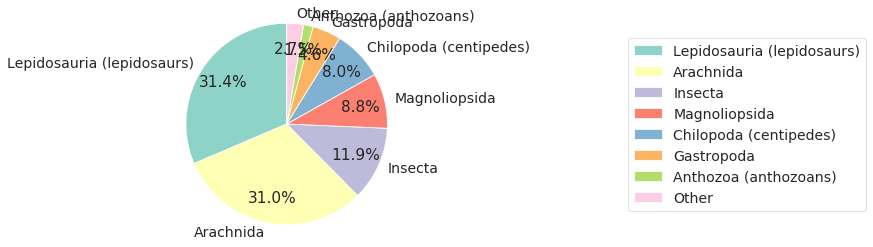

In [38]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set3")


pc = piechart[piechart.Number >2].copy()
pc.loc[7] = ['Other', piechart[piechart.Number <=2].Number.sum()]


fig1, ax1 = plt.subplots()

pc.set_index('Taxonomic lineage (CLASS)').plot(y="Number", kind="pie", \
               counterclock=True, startangle=90, autopct='%1.1f%%', figsize=(4, 4), \
               pctdistance=0.75, labeldistance=1.1, radius=1.5, ax=ax1)
plt.legend(loc='center left', bbox_to_anchor=(2.0, 0.5))
plt.ylabel('');
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('figs/toxins_organisms.pdf',  bbox_inches='tight', pad_inches=0)
plt.show()

#### Non toxin from SignalP5 data

In [39]:
non_toxins_ = all_sp[all_sp.Entry.apply(lambda x: x not in final_toxins.Entry.values)].copy()
non_toxins_['Label'] = 1

#Taking experimentally reviewed only
non_toxins = non_toxins_[non_toxins_['Signal peptide'].apply(lambda x: '000269' in str(x))].copy()
non_toxins['Aligned'] = non_toxins['Protein'].str[1:42]
non_toxins.shape

(2165, 42)

In [40]:
## Cluster non toxins

cl = non_toxins[['Entry', 'Protein']].copy()
cl['Entry'] = '>' + cl['Entry']
cl['Protein'] = cl['Protein'].str[:60]
cl.to_csv('results/nontoxins.fa', sep='\n', index=None, header=None)

!cd-hit -i results/nontoxins.fa -o results/nontoxic_clusters.fa -n 5 -c 0.7

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i results/nontoxins.fa -o
         results/nontoxic_clusters.fa -n 5 -c 0.7

Started: Sat Nov 21 19:07:39 2020
                            Output                              
----------------------------------------------------------------
total seq: 2165
longest and shortest : 60 and 46
Total letters: 129852
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90459096

comparing sequences from          0  to       2165
..
     2165  finished       1738  clusters

Approximated maximum memory consumption: 77M
writing new database
writing clustering information
program completed !

Total CPU time 0.09


In [41]:
clustered = functions.fasta_reader('results/nontoxic_clusters.fa')
# clustered.head(2)

ntoxins = non_toxins[non_toxins['Entry'].apply(lambda x: x in clustered.Accession.values)]
ntoxins = ntoxins.reset_index(drop=True)
ntoxins['Label'] = 0
ntoxins.shape

(1738, 42)

In [42]:
tox_nontoxdf = pd.concat([toxins, ntoxins]).reset_index(drop=True)
tox_nontoxdf.to_pickle('results/toxin_nontoxin.pkl.gz')
tox_nontoxdf.head()

,Entry,All,Protein,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,...,Cross-reference (Pfam),Biotechnological use,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),Cleavage,Aligned,Label,Accession
0,P67875,sp|P67875|RNMG_ASPFU Ribonuclease mitogillin O...,MVAIKNLFLLAATAVSVLAAPSPLDARATWTCINQQLNPKTNKWED...,RNMG_ASPFU,reviewed,Ribonuclease mitogillin (EC 3.1.27.-) (Allerge...,mitF aspF1 AFUA_5G02330,Neosartorya fumigata (strain ATCC MYA-4609 / A...,176,"SIGNAL 1..27; /evidence=""ECO:0000269|Ref.6""",...,NaN,NaN,NaN,NaN,IPR004025;IPR000026;IPR016191;,NaN,27.0,FLLAATAVSVLAAPSPLDARATWTCINQQLNPKTNKWEDKR,1,NaN
1,P08375,sp|P08375|SRX1A_SARPE Sarcotoxin-1A OS=Sarcoph...,MNFQNIFIFVALILAVFAGQSQAGWLKKIGKKIERVGQHTRDATIQ...,SRX1A_SARPE,reviewed,Sarcotoxin-1A (Sarcotoxin IA),NaN,Sarcophaga peregrina (Flesh fly) (Boettcherisc...,63,"SIGNAL 1..23; /evidence=""ECO:0000269|PubMed:3...",...,PF00272;,NaN,NaN,NaN,IPR000875;IPR020400;,PS00268;,23.0,QNIFIFVALILAVFAGQSQAGWLKKIGKKIERVGQHTRDAT,1,NaN
2,P0DMJ5,sp|P0DMJ5|VKT_HETCR PI-stichotoxin-Hcr2e OS=He...,MKGTFLICLILIAGFSFKSTQAGSICLEPKVVGPCTAYFPRFYFDS...,VKT_HETCR,reviewed,PI-stichotoxin-Hcr2e (PI-SHTX-Hcr2e) (Kunitz-t...,NaN,Heteractis crispa (Leathery sea anemone) (Radi...,78,"SIGNAL 1..22; /evidence=""ECO:0000269|PubMed:2...",...,PF00014;,NaN,NaN,"DOMAIN 26..76; /note=""BPTI/Kunitz inhibitor"";...",IPR002223;IPR036880;IPR020901;,PS00280;PS50279;,22.0,GTFLICLILIAGFSFKSTQAGSICLEPKVVGPCTAYFPRFY,1,NaN
3,P01500,sp|P01500|APAM_APIME Apamin OS=Apis mellifera ...,MISMLRCIYLFLSVILITSYFVTPVMPCNCKAPETALCARRCQQHG,APAM_APIME,reviewed,Apamin (Apamine),NaN,Apis mellifera (Honeybee),46,"SIGNAL 1..27; /evidence=""ECO:0000269|PubMed:5...",...,PF17454;,NaN,NaN,NaN,IPR035361;,NaN,27.0,IYLFLSVILITSYFVTPVMPCNCKAPETALCARRCQQHG,1,NaN
4,K9MCH1,sp|K9MCH1|3S11_MICLL Three-finger toxin A1 OS=...,MKTLLLTLVVVTIVCLDFGHTRICYNQQSSQPPTTKTCSEGQCYKK...,3S11_MICLL,reviewed,Three-finger toxin A1 (MlatA1) (Short chain al...,NaN,Micrurus laticollaris (Balsas coral snake),81,"SIGNAL 1..21; /evidence=""ECO:0000269|PubMed:2...",...,NaN,NaN,NaN,NaN,IPR003571;IPR018354;,PS00272;,21.0,KTLLLTLVVVTIVCLDFGHTRICYNQQSSQPPTTKTCSEGQ,1,NaN


In [43]:
tox_nontoxdf.shape

(1999, 42)

In [44]:
tox_nontoxdf.Label.value_counts()

0    1738
1     261
Name: Label, dtype: int64

In [45]:
tox_nontoxdf = pd.read_pickle('results/toxin_nontoxin.pkl.gz')
tox_nontoxdf.Label.value_counts()

0    1738
1     261
Name: Label, dtype: int64

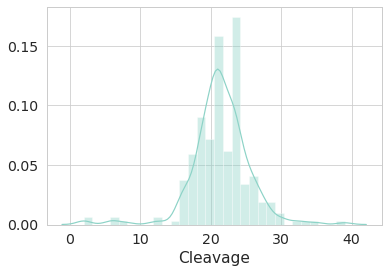

In [46]:
sns.distplot(tox_nontoxdf[tox_nontoxdf.Label == 1]['Cleavage'])

In [2]:
import pandas as pd
for_website = pd.read_pickle('results/toxin_nontoxin.pkl.gz')
for_website.to_csv('results/toxin_nontoxin.csv.gz', index=None)

In [3]:
to = for_website[for_website.Label == 1].copy()
to.shape

(261, 42)

In [4]:
to['Taxonomic lineage (CLASS)'].value_counts()

Lepidosauria (lepidosaurs)       82
Arachnida                        81
Insecta                          31
Magnoliopsida                    23
Chilopoda (centipedes)           21
Gastropoda                       12
Anthozoa (anthozoans)             4
Cubozoa (sea wasps)               2
Asteroidea (starfishes)           1
Sordariomycetes                   1
Eurotiomycetes                    1
Merostomata (horseshoe crabs)     1
Amphibia                          1
Name: Taxonomic lineage (CLASS), dtype: int64

In [5]:
to[to['Protein families'].apply(lambda x: 'inactivating' in str(x).lower())]['Protein names'].values

array(['Ribosome-inactivating protein dianthin-30 (RIP DAP-30) (EC 3.2.2.22) (Antiviral protein DAP-30) (rRNA N-glycosidase) (allergen Dia c RIP)',
       'Ribosome-inactivating protein gynostemmin (EC 3.2.2.22) (rRNA N-glycosidase)',
       'Ribosome-inactivating protein saporin-2 (SAP-2) (SO-2) (EC 3.2.2.22) (rRNA N-glycosidase)',
       'Ricin [Cleaved into: Ricin A chain (EC 3.2.2.22) (rRNA N-glycosidase); Ricin B chain]',
       'Heterotepalin-4 (EC 3.2.2.22) (Ribosome-inactivating protein) (rRNA N-glycosidase)',
       'Beta-galactoside-specific lectin 3 (Beta-galactoside-specific lectin II) (Beta-galactoside-specific lectin III) [Cleaved into: Beta-galactoside-specific lectin 3 chain A isoform 1 (EC 3.2.2.22) (Beta-galactoside-specific lectin III chain A isoform 1) (Lectin chain A isoform 2) (ML-3 A) (ML-III A) (rRNA N-glycosidase); Beta-galactoside-specific lectin 3 chain B (Beta-galactoside-specific lectin III chain B) (ML-3 B) (ML-III B)]',
       "Ribosome-inactivating prote

In [6]:
to['Protein family'] = to['Protein families'].apply(lambda x: str(x).split(', ')[0])

In [7]:
import numpy as np
to['Protein family'] = to['Protein family'].apply(lambda x: np.nan if x == 'nan' else x)

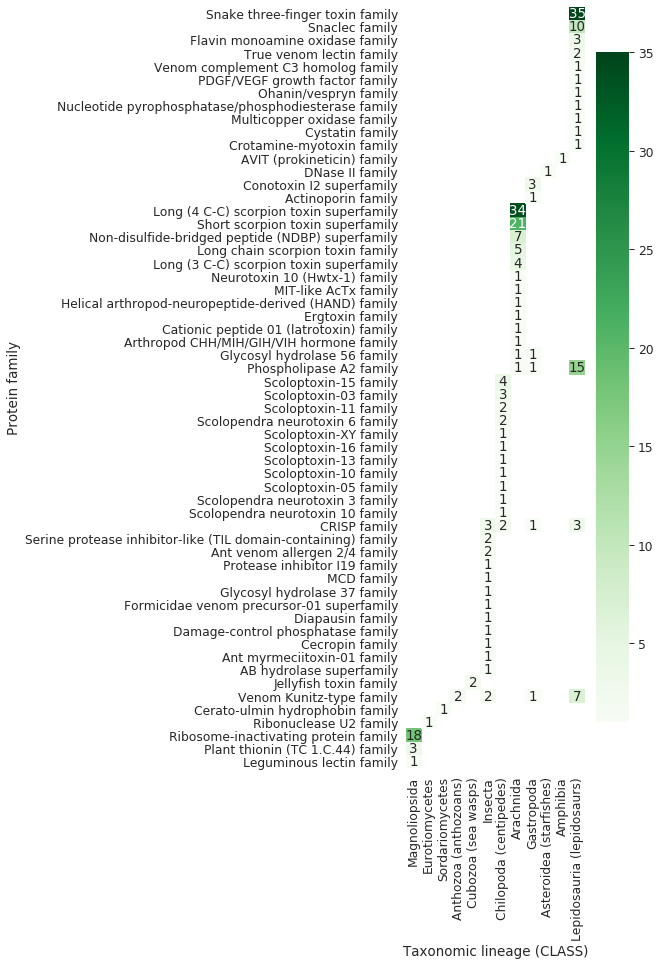

In [10]:
sns.set_context("paper", font_scale=1.4)
plt.figure(figsize=(4, 14))

sort_cols = [#'N/A',
        'Magnoliopsida',
        #     'Eumycetozoa',
        'Eurotiomycetes',
        'Sordariomycetes',
        #     'Chromadorea',

        'Anthozoa (anthozoans)',
        'Cubozoa (sea wasps)',

        'Insecta',
        'Chilopoda (centipedes)',
        'Arachnida',
        #     'Bivalvia',
        'Gastropoda',


#         'Merostomata (horseshoe crabs)',
        'Asteroidea (starfishes)',
        #     'Actinopteri',
        'Amphibia',
        'Lepidosauria (lepidosaurs)',
        #     'Mammalia',
]

to['Heatmap'] = 1 #required for aggregation

new_df = to[['Heatmap','Protein family', 'Taxonomic lineage (CLASS)']]\
.groupby(['Protein family', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Protein family',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')

tt = new_df.copy().sort_values(by=sort_cols, ascending=True)[sort_cols]#.fillna(0)

ax = sns.heatmap(tt , cmap='Greens', annot=True)
ax.invert_yaxis()
# plt.savefig('figs/toxins_protein_families_Training.pdf',  bbox_inches='tight', pad_inches=0)

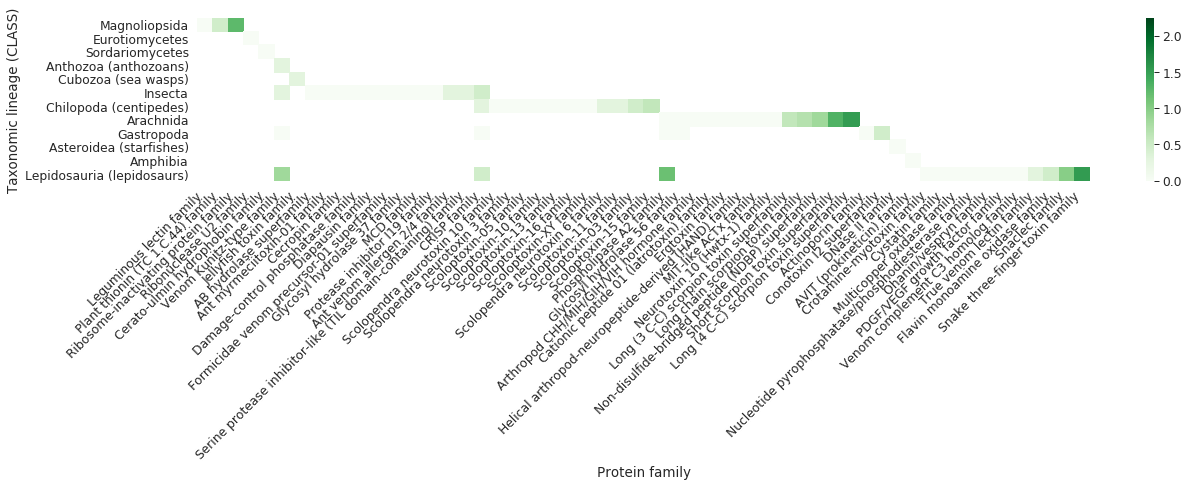

In [11]:
sns.set_context("paper", font_scale=1.4)
plt.figure(figsize=(20, 3))

sort_cols = [#'N/A',
        'Magnoliopsida',
        #     'Eumycetozoa',
        'Eurotiomycetes',
        'Sordariomycetes',
        #     'Chromadorea',

        'Anthozoa (anthozoans)',
        'Cubozoa (sea wasps)',

        'Insecta',
        'Chilopoda (centipedes)',
        'Arachnida',
        #     'Bivalvia',
        'Gastropoda',


#         'Merostomata (horseshoe crabs)',
        'Asteroidea (starfishes)',
        #     'Actinopteri',
        'Amphibia',
        'Lepidosauria (lepidosaurs)',
        #     'Mammalia',
]

to['Heatmap'] = 1 #required for aggregation

new_df = to[['Heatmap','Protein family', 'Taxonomic lineage (CLASS)']]\
.groupby(['Protein family', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Protein family',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')

tt = new_df.copy().sort_values(by=sort_cols, ascending=True)[sort_cols]#.fillna(0)

ax = sns.heatmap(np.log10(tt.transpose()) , cmap='Greens', vmax=2.25, vmin=0)
plt.xticks(rotation=45, ha='right');
# ax.invert_yaxis()
plt.savefig('figs/toxins_protein_families_Training.pdf',  bbox_inches='tight', pad_inches=0)

In [68]:
# pred = pd.read_pickle('figs/toxin_prediction.pkl.gz')

In [16]:
tt.sum().sum()

237.0

In [83]:
piechart = pd.DataFrame(toxins['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']
piechart

,Taxonomic lineage (CLASS),Number
0,Lepidosauria (lepidosaurs),82
1,Arachnida,81
2,Insecta,31
3,Magnoliopsida,23
4,Chilopoda (centipedes),21
5,Gastropoda,12
6,Anthozoa (anthozoans),4
7,Cubozoa (sea wasps),2
8,Sordariomycetes,1
9,Eurotiomycetes,1


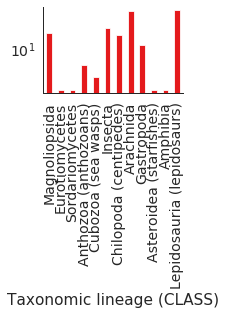

In [63]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set1")


sort_cols = [#'N/A',
        'Magnoliopsida',
        #     'Eumycetozoa',
        'Eurotiomycetes',
        'Sordariomycetes',
        #     'Chromadorea',

        'Anthozoa (anthozoans)',
        'Cubozoa (sea wasps)',

        'Insecta',
        'Chilopoda (centipedes)',
        'Arachnida',
        #     'Bivalvia',
        'Gastropoda',


#         'Merostomata (horseshoe crabs)',
        'Asteroidea (starfishes)',
        #     'Actinopteri',
        'Amphibia',
        'Lepidosauria (lepidosaurs)',
        #     'Mammalia',
]


ax = piechart.set_index('Taxonomic lineage (CLASS)').transpose().sort_values(by=sort_cols)[sort_cols].transpose().plot(kind='bar',\
                             legend=None, figsize=(2.5, 1.6))

# plt.xticks([])
ax.set_yscale('log')
sns.despine()
# plt.savefig('../figs/known_toxins_organisms_bar.pdf',  bbox_inches='tight', pad_inches=0)

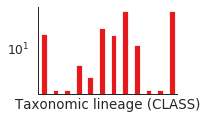

In [82]:
ax = piechart.set_index('Taxonomic lineage (CLASS)').transpose().sort_values(by=sort_cols)[sort_cols].transpose().plot(kind='bar',\
                             legend=None, figsize=(2.5, 1.6))

plt.xticks([])
# ax.set_ylim(0, 100)
ax.set_yscale('log')
sns.despine()
# plt.savefig('figs/training_organisms.pdf',  bbox_inches='tight', pad_inches=0)

In [69]:
# for_website.shape

In [43]:
for_website[for_website.Label == 1].shape

(261, 42)

In [44]:
for_website[for_website['Protein families'].apply(lambda x: 'PDGF/VEGF growth factor family' in str(x))]

,Entry,All,Protein,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,...,Cross-reference (Pfam),Biotechnological use,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),Cleavage,Aligned,Label,Accession
142,C0K3N1,sp|C0K3N1|TXVE_BITAR Snake venom vascular endo...,MAAYLLAVAILFCIQGWPSGTVQGEVRPFMEVYQRSVCQPRETLVS...,TXVE_BITAR,reviewed,Snake venom vascular endothelial growth factor...,NaN,Bitis arietans (African puff adder),150,"SIGNAL 1..24; /evidence=""ECO:0000269|PubMed:1...",...,PF00341;,NaN,NaN,NaN,IPR029034;IPR023581;IPR000072;,PS00249;PS50278;,24.0,LLAVAILFCIQGWPSGTVQGEVRPFMEVYQRSVCQPRETLV,1,NaN
833,P49763,sp|P49763|PLGF_HUMAN Placenta growth factor OS...,MPVMRLFPCFLQLLAGLALPAVPPQQWALSAGNGSSEVEVVPFQEV...,PLGF_HUMAN,reviewed,Placenta growth factor (PlGF),PGF PGFL PLGF,Homo sapiens (Human),221,"SIGNAL 1..18; /evidence=""ECO:0000269|PubMed:7...",...,PF00341;,NaN,NaN,NaN,IPR029034;IPR023581;IPR000072;,PS00249;PS50278;,18.0,PVMRLFPCFLQLLAGLALPAVPPQQWALSAGNGSSEVEVVP,0,P49763|EUKARYA|SP|3
1125,P15691,sp|P15691|VEGFA_BOVIN Vascular endothelial gro...,MNFLLSWVHWSLALLLYLHHAKWSQAAPMAEGGQKPHEVVKFMDVY...,VEGFA_BOVIN,reviewed,Vascular endothelial growth factor A (VEGF-A) ...,VEGFA VEGF,Bos taurus (Bovine),190,"SIGNAL 1..26; /evidence=""ECO:0000269|PubMed:2...",...,PF00341;PF14554;,NaN,NaN,NaN,IPR029034;IPR023581;IPR000072;IPR027928;IPR036...,PS00249;PS50278;,26.0,NFLLSWVHWSLALLLYLHHAKWSQAAPMAEGGQKPHEVVKF,0,P15691|EUKARYA|SP|0
1149,P49767,sp|P49767|VEGFC_HUMAN Vascular endothelial gro...,MHLLGFFSVACSLLAAALLPGPREAPAAAAAFESGLDLSDAEPDAG...,VEGFC_HUMAN,reviewed,Vascular endothelial growth factor C (VEGF-C) ...,VEGFC,Homo sapiens (Human),419,"SIGNAL 1..31; /evidence=""ECO:0000269|PubMed:1...",...,PF03128;PF00341;,NaN,NaN,NaN,IPR004153;IPR029034;IPR023581;IPR000072;,PS00249;PS50278;,31.0,HLLGFFSVACSLLAAALLPGPREAPAAAAAFESGLDLSDAE,0,P49767|EUKARYA|SP|0


In [ ]:
from time import sleep

i = 0

while True:
    print(i, end="\r")
    sleep(500)
    i += 1